## Data Cleaning - Preprocessing


In our second notebook, we focused on a comprehensive preprocessing and analysis approach for the textual data collected from Reuters. Our process commenced with the preprocess_text function, which efficiently removes any Reuters-specific prefixes from the articles, discards special characters, and converts all text to lowercase for consistency. We identified and eliminated additional stopwords, including common words like 'said' and 'Reuters', as well as days of the week. This was followed by lemmatization using the WordNetLemmatizer to ensure that words were reduced to their base forms.

We then applied this preprocessing methodology to our DataFrame using the preprocess_dataframe function. This step involved processing a specified text column and generating a new column for the cleaned text, thus preparing our dataset for in-depth analysis.

Following this, our analyze_texts function undertook a thorough analysis of the text. It calculated the total and mean number of words, and the total length of the text in characters. To visually showcase the most frequent words in our dataset, we generated a word cloud. This graphical representation provided an immediate insight into the word frequency distribution.

Lastly, we implemented the plot_top_25_words function to identify and visualize the top 25 most frequent words in our dataset. This involved combining all text, tokenizing it into words, and counting word frequencies using a Counter. The resulting data was presented in a horizontal bar plot, clearly displaying the most dominant words in our collection of articles.

### Importing Necessary Libraries

In [1]:
# General
import pandas as pd
import numpy as np
import re
from collections import Counter

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer

# Word Cloud
from wordcloud import WordCloud

# Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')


# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\ΑΝΤΩΝΙΟΣ
[nltk_data]     ΜΑΥΡΙΔΗΣ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ΑΝΤΩΝΙΟΣ
[nltk_data]     ΜΑΥΡΙΔΗΣ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ΑΝΤΩΝΙΟΣ
[nltk_data]     ΜΑΥΡΙΔΗΣ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ΑΝΤΩΝΙΟΣ
[nltk_data]     ΜΑΥΡΙΔΗΣ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
def preprocess_text(text:str) -> str:
    """
    Preprocesses a given text by performing several operations:
    1. Removes the Reuters prefix pattern.
    2. Eliminates special characters.
    3. Converts text to lowercase.
    4. Removes stopwords including some additional custom stopwords.
    5. Applies lemmatization to the words.

    :param text: A string containing the text to be preprocessed.
    :return: The preprocessed text as a string.
    """
    # Remove the Reuters prefix pattern (e.g., "GAZA/JERUSALEM, Nov 20 (Reuters) -")
    text = re.sub(r'^.*?\(Reuters\)\s*-\s*', '', text).strip()

    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Lowercasing
    text = text.lower()

    # Define additional stopwords
    additional_stopwords = set(['said','reuters', 'thomson', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])

    # Combine stopwords with additional stopwords
    all_stopwords = STOPWORDS.union(additional_stopwords)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in all_stopwords])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

def preprocess_dataframe(df: pd.DataFrame, text_column: str, preprocessed_column: str) -> pd.DataFrame:
    """
    Applies text preprocessing to a specific column of a DataFrame.

    :param df: The DataFrame containing the text data.
    :param text_column: The name of the column in the DataFrame that contains the text to be preprocessed.
    :param preprocessed_column: The name of the column where the preprocessed text will be stored.
    :return: The DataFrame with the preprocessed text in the specified column.
    """
    df[preprocessed_column] = df[text_column].apply(preprocess_text)
    return df


def analyze_texts(df: pd.DataFrame, text_column: str):
    """
    Analyzes text data in a DataFrame by computing various statistics and generating a word cloud.
    It calculates the total number of words, the mean number of words per text, and the total length in characters.
    Additionally, it generates and displays a word cloud based on the text data.

    :param df: DataFrame containing the text data.
    :param text_column: The name of the column in the DataFrame that contains the text.
    """
    # Concatenate all text
    all_text = ' '.join(df[text_column])

    # Split into words
    words = all_text.split()

    # Calculate total number of words
    total_words = len(words)
    print(f"Total number of words: {total_words}")

    # Calculate mean number of words per text
    mean_words = total_words / len(df)
    print(f"Mean number of words per text: {mean_words:.2f}")

    # Calculate total length in characters
    total_length_characters = len(all_text)
    print(f"Total length of all the text together in characters: {total_length_characters}")

    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

def plot_top_25_words(df: pd.DataFrame, column='text'):
    """
    Plots the top 25 most frequent words in a specified column of a DataFrame.
    This function tokenizes the text, counts the word frequencies, and then creates a horizontal bar plot
    to visualize the top 25 most common words.

    :param df: DataFrame containing the text data.
    :param column: The name of the column in the DataFrame that contains the text. Defaults to 'text'.
    """
        
    # Combine all text into a single string
    all_text = ' '.join(df[column])

    # Tokenize and count words
    words = re.findall(r'\w+', all_text.lower())
    word_counts = Counter(words)

    # Select top 25 words
    top_25 = word_counts.most_common(25)

    # Prepare data for plotting
    words, counts = zip(*top_25)
    words = list(reversed(words))
    counts = list(reversed(counts))

    # Create horizontal bar plot
    plt.figure(figsize=(10, 8))
    plt.barh(words, counts, color='black')
    plt.xlabel('Frequencies')
    plt.ylabel('Words')
    plt.title('Top 25 Most Frequent Words')
    plt.show()

### Importing Dataset

In [4]:
df = pd.read_csv('./Datasets/reuters_search_news_israel.csv', delimiter=';')
df = df.dropna(subset=['text'])
df = df.reset_index(drop=True)
df["text"] = df["text"].apply(str)
df.head(5)

,title,url,date,source,text
0,X's CEO tells staff data will show efforts to ...,https://www.reuters.com/technology/xs-ceo-tell...,"November 20, 2023",Reuters,Nov 20 (Reuters) - Social media company X CEO ...
1,Premature Gaza babies evacuated to Egypt as Is...,https://www.reuters.com/world/middle-east/isra...,"November 20, 2023",Reuters,"GAZA/JERUSALEM, Nov 20 (Reuters) - Twenty-eigh..."
2,U.S. Democrats urge Biden to push Israel over ...,https://www.reuters.com/world/us-democrats-urg...,"November 20, 2023",Reuters,"WASHINGTON, Nov 20 (Reuters) - A group of U.S...."
3,Red Cross president meets with Hamas leader in...,https://www.reuters.com/world/middle-east/red-...,"November 20, 2023",Reuters,"GENEVA, Nov 20 (Reuters) - The International R..."
4,2024 US presidential election: Who are the can...,https://www.reuters.com/world/us/who-are-candi...,"November 20, 2023",Reuters,Nov 20 (Reuters) - Seven Republican candidates...


In [5]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2644 non-null   object
 1   url     2644 non-null   object
 2   date    2644 non-null   object
 3   source  2644 non-null   object
 4   text    2644 non-null   object
dtypes: object(5)
memory usage: 103.4+ KB


### Perform Preprocessing

In [7]:
df = preprocess_dataframe(df, "text","preprocessed_text")
df.head(5)

,title,url,date,source,text,preprocessed_text
0,X's CEO tells staff data will show efforts to ...,https://www.reuters.com/technology/xs-ceo-tell...,"November 20, 2023",Reuters,Nov 20 (Reuters) - Social media company X CEO ...,social medium company x ceo linda yaccarino to...
1,Premature Gaza babies evacuated to Egypt as Is...,https://www.reuters.com/world/middle-east/isra...,"November 20, 2023",Reuters,"GAZA/JERUSALEM, Nov 20 (Reuters) - Twenty-eigh...",twentyeight prematurely born baby evacuated ga...
2,U.S. Democrats urge Biden to push Israel over ...,https://www.reuters.com/world/us-democrats-urg...,"November 20, 2023",Reuters,"WASHINGTON, Nov 20 (Reuters) - A group of U.S....",group president joe bidens fellow democrat urg...
3,Red Cross president meets with Hamas leader in...,https://www.reuters.com/world/middle-east/red-...,"November 20, 2023",Reuters,"GENEVA, Nov 20 (Reuters) - The International R...",international red cross president travelled qa...
4,2024 US presidential election: Who are the can...,https://www.reuters.com/world/us/who-are-candi...,"November 20, 2023",Reuters,Nov 20 (Reuters) - Seven Republican candidates...,seven republican candidate jostling party pres...


Total number of words: 646684
Mean number of words per text: 244.59
Total length of all the text together in characters: 4904443


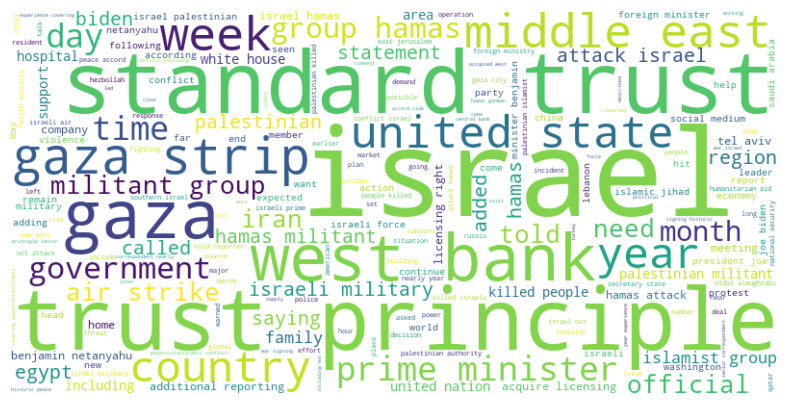

In [8]:
analyze_texts(df, "preprocessed_text")

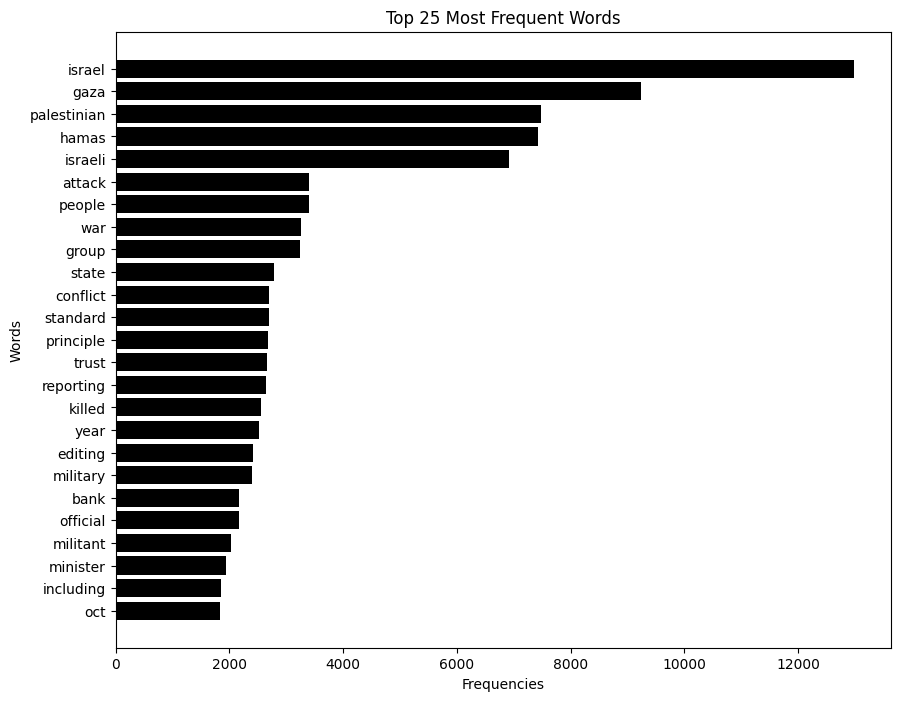

In [9]:
plot_top_25_words(df, column='preprocessed_text') 

In [9]:
df.to_pickle('./Datasets/preprocessed_news.pkl')